Proyecto Individual N°2 - Henry - Oliva Pinto

EDA - Analisis Exploratorio de Datos
Con e¿la base de datos organizada vamos a efectuar un analisis exploratorio de datos en busca de informacion que nos guie en nuestra siguiente etapa del proyecto. 

In [3]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Cargamos el archivo luego del ETL
aviones_db = pd.read_csv("/Users/tobiasolivapinto/Desktop/Proyecto Individual 2 - Henry/AccidentesAviones_ETL3.csv")
#Visualizamos como se cargo
aviones_db.head(5)

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,militar,horario,año,mes,dia,Pais,mar
0,Military - U.S. Army,Wright Flyer III,Sin Dato,2.0,1,0,"During a demonstration flight, a U.S. Army fly...",militar,Diurno,1908,September,Thursday,United States,0.0
1,Sin Dato,Wright Byplane,SC1,1.0,1,0,Eugene Lefebvre was the first pilot to ever be...,civil,Sin Dato,1909,September,Tuesday,France,0.0
2,Military - U.S. Navy,Dirigible,Sin Dato,5.0,5,0,First U.S. dirigible Akron exploded just offsh...,militar,Nocturno,1912,July,Friday,United States,0.0
3,Private,Curtiss seaplane,Sin Dato,1.0,1,0,The first fatal airplane accident in Canada oc...,civil,Sin Dato,1913,August,Wednesday,Canada,0.0
4,Military - German Navy,Zeppelin L-1 (airship),Sin Dato,20.0,14,0,The airship flew into a thunderstorm and encou...,militar,Diurno,1913,September,Tuesday,North Sea,1.0


In [5]:
#Observamos las caracteristicas luego de la carga
aviones_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OperadOR                5005 non-null   object 
 1   ac_type                 5002 non-null   object 
 2   registration            4998 non-null   object 
 3   all_aboard              4988 non-null   float64
 4   cantidad de fallecidos  4988 non-null   object 
 5   ground                  4988 non-null   object 
 6   summary                 4988 non-null   object 
 7   militar                 4987 non-null   object 
 8   horario                 4986 non-null   object 
 9   año                     4986 non-null   object 
 10  mes                     4986 non-null   object 
 11  dia                     4986 non-null   object 
 12  Pais                    4976 non-null   object 
 13  mar                     4972 non-null   float64
dtypes: float64(2), object(12)
memory usage: 

Suele pasar que luego de exportar el archivo y volverlo a cargar, los tipos de datos se alteren.

In [6]:
#Visualizamos nulos 
aviones_db.isnull().sum()

OperadOR                   0
ac_type                    3
registration               7
all_aboard                17
cantidad de fallecidos    17
ground                    17
summary                   17
militar                   18
horario                   19
año                       19
mes                       19
dia                       19
Pais                      29
mar                       33
dtype: int64

Observamos que sucedio con los nulos

In [7]:
#Vemos los registros con nulos
nulos = aviones_db.loc[aviones_db["mar"].isnull()]
nulos.head(33)

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,militar,horario,año,mes,dia,Pais,mar
58,US Aerial Mail Service,De Havilland DH-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,De Havilland DH-4,176,1,1.0,0,Crashed while attempting to land.,civil,Sin Dato,1921,May,Tuesday,United States,0,NaN
108,Deutche Lufthansa,Junkers F-13,D-290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,D-290,1,1,0.0,While in a training filight the aircraft stall...,civil,Sin Dato,1926,March,Monday,Germany,0,NaN,NaN
124,Varney Air Lines,Swallow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Swallow,Sin Dato,1,1.0,0,Crashed after an unsuccessful attempt at fly i...,civil,Sin Dato,1927,April,Friday,United States,0,NaN
130,KLM Royal Dutch Airlines,Fokker F-VIII,H-NADU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,H-NADU,11,1,0.0,A broken wire led to the partial loss of the t...,civil,Diurno,1927,August,Monday,UK,0,NaN,NaN
132,Colonial Air Transport,Fokker Universal,NC52 \t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NC52,1,1,0.0,The postal plane crashed for unknown reasons.,civil,Sin Dato,1927,September,Saturday,United States,0,NaN,NaN


Como tenemos 5000 datos y vemos que todos los nulos se situa en estas 33 filas, las eliminaremos

In [8]:
#Eliminamos los 33 registros con nulos
aviones_db.dropna(inplace=True)

In [9]:
#Corroboramos
aviones_db.isnull().sum()

OperadOR                  0
ac_type                   0
registration              0
all_aboard                0
cantidad de fallecidos    0
ground                    0
summary                   0
militar                   0
horario                   0
año                       0
mes                       0
dia                       0
Pais                      0
mar                       0
dtype: int64

In [10]:
#Cambiamos las columnas numericas por tipo int
aviones_db["all_aboard"] = aviones_db["all_aboard"].astype(int)
aviones_db["cantidad de fallecidos"] = aviones_db["cantidad de fallecidos"].astype(int)
aviones_db["ground"] = aviones_db["ground"].astype(int)
aviones_db["año"] = aviones_db["año"].astype(int)
aviones_db["mar"] = aviones_db["mar"].astype(int)

In [11]:
#Cambiamos las categorias por tipo "category"
aviones_db["militar"] = aviones_db["militar"].astype("category")
aviones_db["horario"] = aviones_db["horario"].astype("category")
aviones_db["mes"] = aviones_db["mes"].astype("category")
aviones_db["dia"] = aviones_db["dia"].astype("category")
aviones_db["Pais"] = aviones_db["Pais"].astype("category")
aviones_db["mar"] = aviones_db["mar"].astype("category")

In [12]:
#Modificamos las columnas mar y militar
aviones_db["mar"] = aviones_db["mar"].replace({1: "maritimo", 0: "terrestre"})

In [13]:
#Observamos las caracteristicas luego de la carga
aviones_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OperadOR                4972 non-null   object  
 1   ac_type                 4972 non-null   object  
 2   registration            4972 non-null   object  
 3   all_aboard              4972 non-null   int64   
 4   cantidad de fallecidos  4972 non-null   int64   
 5   ground                  4972 non-null   int64   
 6   summary                 4972 non-null   object  
 7   militar                 4972 non-null   category
 8   horario                 4972 non-null   category
 9   año                     4972 non-null   int64   
 10  mes                     4972 non-null   category
 11  dia                     4972 non-null   category
 12  Pais                    4972 non-null   category
 13  mar                     4972 non-null   category
dtypes: category(6), int64(4)

Con el data drame ya cargado y acomodado, vamos a empezar con el analisis exploratorio de datos. 

Tenemos varias hipotesis de como disminuir los accidentes aereos, lo que llevaria menores muertes a causas de accidentes aereos. Para corroborar si son validas, haremos diferentes graficos que nos muestren el coportamiento de los datos con respecto a las distintas variables.

In [16]:
#Visualizamos el data frame
aviones_db.head()

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,militar,horario,año,mes,dia,Pais,mar
0,Military - U.S. Army,Wright Flyer III,Sin Dato,2,1,0,"During a demonstration flight, a U.S. Army fly...",militar,Diurno,1908,September,Thursday,United States,terrestre
1,Sin Dato,Wright Byplane,SC1,1,1,0,Eugene Lefebvre was the first pilot to ever be...,civil,Sin Dato,1909,September,Tuesday,France,terrestre
2,Military - U.S. Navy,Dirigible,Sin Dato,5,5,0,First U.S. dirigible Akron exploded just offsh...,militar,Nocturno,1912,July,Friday,United States,terrestre
3,Private,Curtiss seaplane,Sin Dato,1,1,0,The first fatal airplane accident in Canada oc...,civil,Sin Dato,1913,August,Wednesday,Canada,terrestre
4,Military - German Navy,Zeppelin L-1 (airship),Sin Dato,20,14,0,The airship flew into a thunderstorm and encou...,militar,Diurno,1913,September,Tuesday,North Sea,maritimo


Comenzamos por observar el comportamiento de las variables numericas.

In [17]:
aviones_db.describe()

,all_aboard,cantidad de fallecidos,ground,año
count,4972.000000,4972.000000,4972.000000,4972.000000
mean,31.219630,22.389984,1.715607,1971.019912
std,45.537078,35.071169,55.450914,24.641265
min,0.000000,0.000000,0.000000,1908.000000
25%,7.000000,4.000000,0.000000,1951.000000
50%,16.000000,11.000000,0.000000,1970.000000
75%,35.000000,25.000000,0.000000,1992.000000
max,644.000000,583.000000,2750.000000,2021.000000


En este grafico podemos ver los rangos de la cantidad de pasajeros dentro del avion, de la cantidad de fallecidos tanto en tierra como de pasajeros y el rango de años que contiene el dat frame. 

In [18]:
#Observamos los vuelos con cero pasajeros abordo
#Vemos los registros con nulos
sin_pasajeros = aviones_db.loc[aviones_db["all_aboard"] == 0]
sin_pasajeros.head(33)

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,militar,horario,año,mes,dia,Pais,mar
26,Wingfoot Air Express Goodyear Tire,FD Type Dirigible,Sin Dato,0,3,10,"The dirigible, cruising at 1,200 ft. caught fi...",civil,Diurno,1919,July,Monday,United States,terrestre
3138,Military - Turkish Air Force,Northrop F-5A,Sin Dato,0,0,40,The fighter crashed into a village after the p...,militar,Sin Dato,1981,September,Tuesday,Turkey,terrestre
3370,Military - French Air Force,Sepecat Jaguar A,Sin Dato,0,0,35,The jet fighter crashed into a school shortly ...,militar,Sin Dato,1986,March,Thursday,Central African Republic,terrestre


Al primero le vamos a poner 3 pasajeros a bordo por la cantidad de fallecidos y a los restantes 1 pasajero a bordo por que parecen ser aviones de uno o dos tripulantes. 

In [19]:
#Remplazamos valores
aviones_db.loc[26, "all_aboard"] = 3
aviones_db.loc[3138, "all_aboard"] = 1
aviones_db.loc[3370, "all_aboard"] = 1

Agregamos una columna con la cantidad total de fallecidos por accidente.

In [20]:
#Creamos la nueva columna con el total de fallecidos
aviones_db['total_muertes'] = aviones_db['ground'] + aviones_db['cantidad de fallecidos']

In [21]:
#volvemos a cargar las estadisticas
aviones_db.describe()

,all_aboard,cantidad de fallecidos,ground,año,total_muertes
count,4972.000000,4972.000000,4972.000000,4972.000000,4972.000000
mean,31.220636,22.389984,1.715607,1971.019912,24.105591
std,45.536413,35.071169,55.450914,24.641265,66.564446
min,1.000000,0.000000,0.000000,1908.000000,0.000000
25%,7.000000,4.000000,0.000000,1951.000000,4.000000
50%,16.000000,11.000000,0.000000,1970.000000,12.000000
75%,35.000000,25.000000,0.000000,1992.000000,26.000000
max,644.000000,583.000000,2750.000000,2021.000000,2842.000000


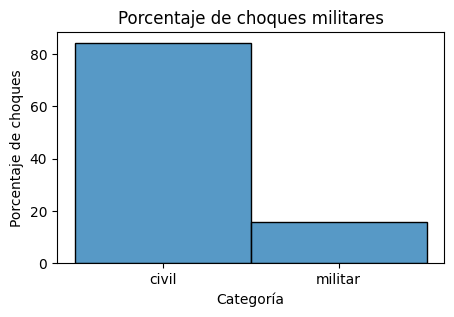

In [22]:
#Visualizamos la cantidad de choques militares
total_choques = len(aviones_db)  # Total de choques en todas las categorías

plt.figure(figsize=(5, 3))
sns.histplot(data=aviones_db, x="militar", weights=np.ones_like(aviones_db.index) / total_choques * 100)
plt.title("Porcentaje de choques militares")
plt.xlabel("Categoría")
plt.ylabel("Porcentaje de choques")
plt.show()

Consideramos que gran parte de los accidentes de aviones militares no son por las mismas causas que los accidentes del resto de los vuelos y como nuestro cliente esta interesado en la aviacion civil, vamos a eliminar todos los registros de accidentes militares.

In [23]:
#Eliminamos los registros de choques militares
aviones_db.drop(aviones_db[aviones_db["militar"] == "militar"].index, inplace=True)

In [24]:
#Eliminamos la columna "militar"
aviones_db.drop(["militar"], axis=1, inplace=True)

Comenzaremos a estudiar la variacion de la cantidad de accidentes aereos.

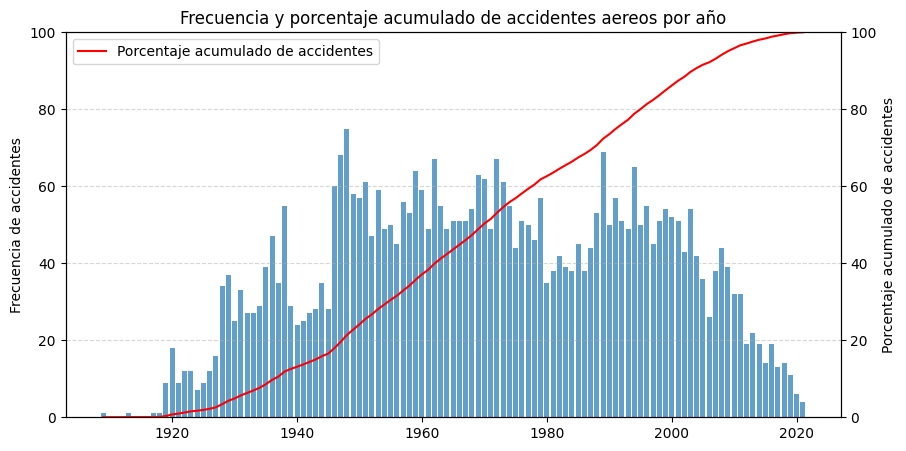

In [26]:
#Graficamos la cantidad de accidentes aereos por año.
plt.figure(figsize=(10, 5))
total_choques = len(aviones_db)  #Total de accidentes en todos los años

#Frecuencia de accidentes por año
frecuencia_choques = aviones_db["año"].value_counts().sort_index()

#Porcentaje acumulado de caccidentes
porcentaje_acumulado = (frecuencia_choques / total_choques * 100).cumsum()

#Graficamos la frecuencia de choques en un grafico de barras
ax1 = plt.gca()
ax1.bar(frecuencia_choques.index, frecuencia_choques.values, alpha=0.7)

#Graficamos el porcentaje acumulado de choques en un grafico de lineas
ax2 = ax1.twinx()
ax2.plot(frecuencia_choques.index, porcentaje_acumulado, linestyle="-", color="red")

#Ajustamos los ejes Y
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)

#Agregamos cuadrícula
ax1.grid(axis="y", linestyle="--", alpha=0.5)

#Ajustamos los ejes Y
ax1.set_ylabel("Frecuencia de accidentes")
ax2.set_ylabel("Porcentaje acumulado de accidentes")

plt.title("Frecuencia y porcentaje acumulado de accidentes aereos por año")
plt.xlabel("Año")
plt.legend(["Porcentaje acumulado de accidentes"])

plt.show()

Deducimos que la distribucion se debe a que en el periodo 1910-1950 aumentaron la frecuencia de vuelos pero no las medidas de seguridad, era una etapa expermiental. Luego continuaron aumentando la cantidad de vuelos pero a partir del año 1990 se empezo a trabajar en la seguridad con respecto a la aviacion. Para mejorar el grafico habria que buscar informacion acerca de la cantidad total de vuelos en este periodo. Podemos ver que el 85% de los accidentes aereos ocurrieron antes del año 2000. Para el año 2010 ya habian ocurrido el 95% de accidentes aereos, a pesar de que cada año aumentan la cantidad de vuelos, segun fuentes de internet.

Basado en una investigacion acerca de la aviacion en general, vamos a descartar todos los datos previos al fin de la W.W.II, es decir, el año 1945. Esta decision se toma ya que a partir de la fecha la aviacion civil y militar se dividen, creando modelos aptos para el transporte de pasajeros en general. Hay un gran cambio en lo que son los materiales de construccion de los aviones, lo que produce un cambio radical enla seguridad de los vuelos, con la sumatoria de que la frecuecia de vuelos en genral aumenta en gran medida. 
Ademas, va alineado con la decision de dar de baja todos los accidentes militares. 

In [27]:
#Creamos el nuevo data frame
aviones_1945 = aviones_db[aviones_db["año"] >= 1945].copy()
aviones_1945.head()

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,horario,año,mes,dia,Pais,mar,total_muertes
767,China National Aviation Corporation,Douglas C-47,77,4,4,0,The cargo plane crashed in strong winds,Sin Dato,1945,January,Saturday,India,terrestre,4
768,Pan American World Airways,Martin M-130 (flying boat),NC14716,30,23,0,The aircraft crashed 1.25 miles short of the i...,Nocturno,1945,January,Monday,Trinidad,terrestre,23
769,American Airlines,Douglas DC-3,NC25684,24,24,0,"The aircraft, lost in fog, crashed into the Ve...",Nocturno,1945,January,Wednesday,United States,terrestre,24
770,China National Aviation Corporation,Douglas C-47,70,6,4,0,The cargo plane struck a mountain.,Sin Dato,1945,January,Sunday,China,terrestre,4
771,China National Aviation Corporation,Douglas C-47,Sin Dato,3,3,0,Sin Dato,Sin Dato,1945,January,Tuesday,China,terrestre,3


Vamos hacer un analisis de la cantidad de accidentes que hubo cada mes historicamente. 

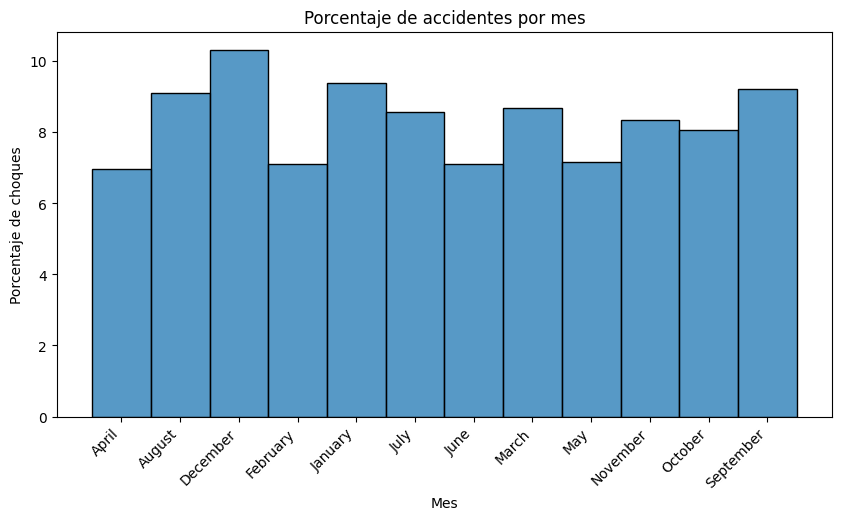

In [30]:
#Graficamos la cantidad de accidentes por mes historicamente
plt.figure(figsize=(10, 5))
total_choques = len(aviones_1945)  # Total de choques en todos los meses
sns.histplot(data=aviones_1945, x="mes", weights=np.ones_like(aviones_1945.index) / total_choques * 100)
plt.title("Porcentaje de accidentes por mes")
plt.xlabel("Mes")
plt.ylabel("Porcentaje de choques")
plt.xticks(rotation=45, ha="right")  # Ajusta el espaciado y la orientación de los nombres de los meses
plt.show()

Vemos que la cantidad de choques por mes no varia de forma significativa, por lo que por ahora, hasta que no hagamos un analisis por hemisferio, podemos descartar analizar la cantidad de choques por estacion. 

Haremos lo mismo para los dias de la semana.

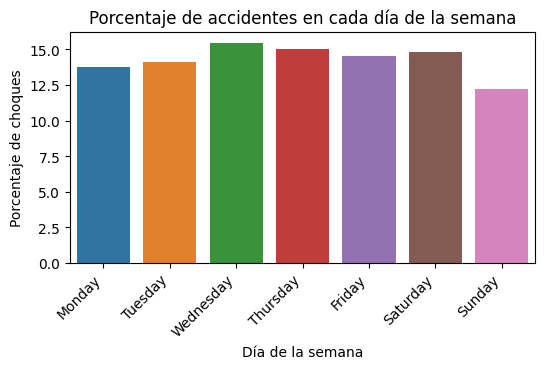

In [31]:
#Graficamos la cantidad de accidentes por dia de la semana
plt.figure(figsize=(6, 3))
total_choques = len(aviones_1945)  # Total de choques en todos los días

# Calcula el porcentaje de choques por día
porcentaje_choques = aviones_1945["dia"].value_counts(normalize=True) * 100

# Ordena los días de la semana
dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Crea el gráfico de barras con los porcentajes y el color "blue"
sns.barplot(x=porcentaje_choques.index, y=porcentaje_choques.values, order=dias_semana)

plt.title("Porcentaje de accidentes en cada día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Porcentaje de choques")
plt.xticks(rotation=45, ha="right")

plt.show()

Al igual que con los meses, no se observa una variacion significativa con respecto a los dias de semana. Por lo que un analisis de si los pilotos estan mas cansados los fines de semana no es valida.

Ahora vamos a visualizar la cantidad de accidentes segun el resto de las varibales.

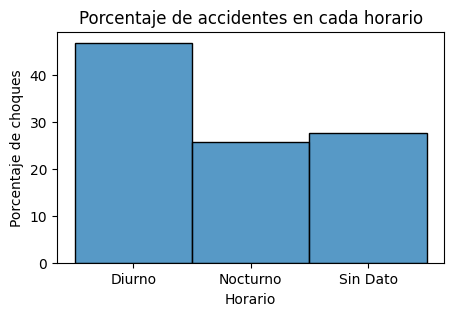

In [32]:
#Visualizamos la cantidad de accidentes en cada horario
total_choques = len(aviones_1945)  # Total de choques en todos los horarios

plt.figure(figsize=(5, 3))
sns.histplot(data=aviones_1945, x="horario", weights=np.ones_like(aviones_1945.index) / total_choques * 100)
plt.title("Porcentaje de accidentes en cada horario")
plt.xlabel("Horario")
plt.ylabel("Porcentaje de choques")
plt.show()

En esta grafica observamos que hay una gran falta de datos, que deben ser tomados en cuenta. Pero de todas formas, notamos que aproximadamente se producen el doble de los accidentes de dia. Siendo casi el 50% de los accidentes totales. 

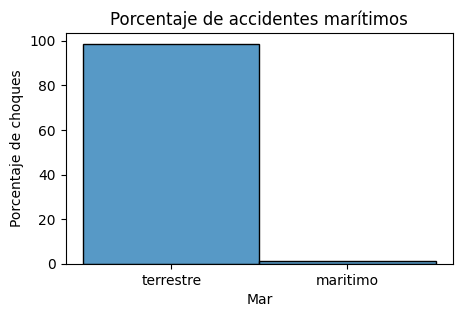

In [33]:
#Visualizamos la cantidad de choques maritimos
total_choques = len(aviones_1945)  # Total de choques en todos los registros

plt.figure(figsize=(5, 3))
sns.histplot(data=aviones_1945, x="mar", weights=np.ones_like(aviones_1945.index) / total_choques * 100)
plt.title("Porcentaje de accidentes marítimos")
plt.xlabel("Mar")
plt.ylabel("Porcentaje de choques")
plt.show()

Creamos un nuevo data frame reducido para trabajar mas comodos. 

In [34]:
#Creamos el df con las columnas de interes
df_mod = aviones_1945[["all_aboard", "cantidad de fallecidos", "ground", "horario", "año", "mar", "total_muertes"]].copy()
df_mod.head()

,all_aboard,cantidad de fallecidos,ground,horario,año,mar,total_muertes
767,4,4,0,Sin Dato,1945,terrestre,4
768,30,23,0,Nocturno,1945,terrestre,23
769,24,24,0,Nocturno,1945,terrestre,24
770,6,4,0,Sin Dato,1945,terrestre,4
771,3,3,0,Sin Dato,1945,terrestre,3


In [35]:
#Vamos a comparar las muertes en vuelo contra las muertes en tierra
total_vuelo = df_mod["all_aboard"].sum()
total_tierra = df_mod["ground"].sum()
print(total_vuelo)
print(total_tierra)

127442
7361


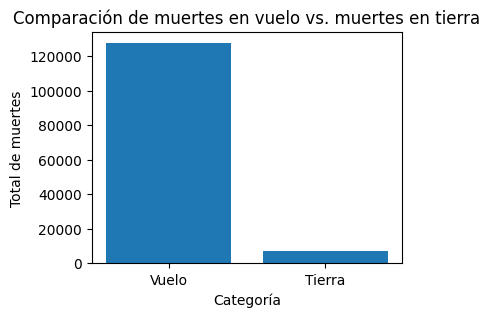

In [36]:
#Graficamos
muertes = [total_vuelo, total_tierra]
categorias = ["Vuelo", "Tierra"]

plt.figure(figsize=(4, 3))
plt.bar(categorias, muertes)
plt.title("Comparación de muertes en vuelo vs. muertes en tierra")
plt.xlabel("Categoría")
plt.ylabel("Total de muertes")
plt.show()

Observamos un porcentaje poco significativo de muertes en tierra comparado a las muertes en vuelo.

Vamos a analizar la cantidad de muertes por año.

In [37]:
#Generamos un nuevo df con la suma de muertes por cada año
muertes_por_anio = df_mod.groupby("año")["total_muertes"].sum().reset_index()
muertes_por_anio.head()

,año,total_muertes
0,1945,306
1,1946,821
2,1947,1050
3,1948,1216
4,1949,1001


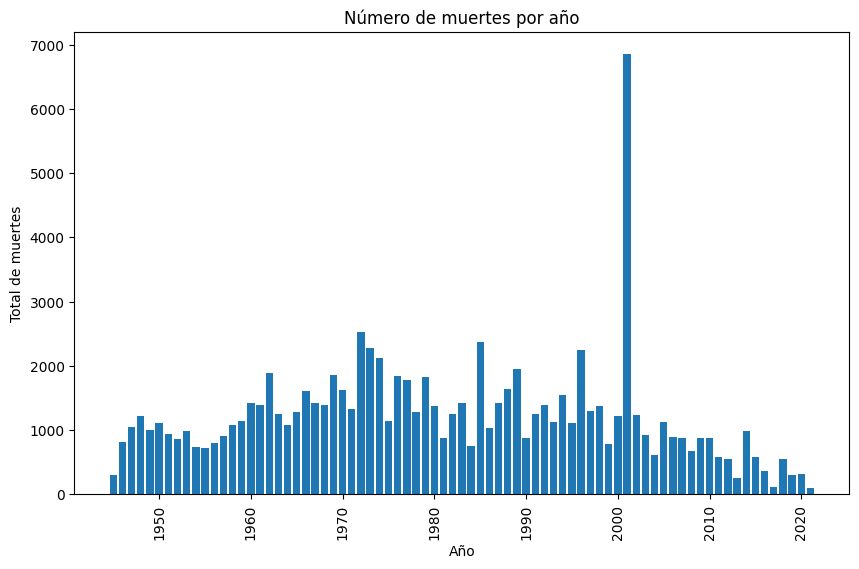

In [38]:
#creamos un grafico para una visualizacion completa de los datos
plt.figure(figsize=(10, 6))
plt.bar(muertes_por_anio["año"], muertes_por_anio["total_muertes"])
plt.title("Número de muertes por año")
plt.xlabel("Año")
plt.ylabel("Total de muertes")
plt.xticks(rotation=90)
plt.show()

Observamos que la cantidad de muertes por tiene un distribucion similar a la de la cantidad de accidentes por año, son directamente proporcionales. Claramente hay un outlier, que dada la fecha y la cantidad de muertes, suponemos que se trata del atentado a las torres gemelas, el 9 de septiembre del 2001.

Ahora vamos a analizar la cantidad promedio de muertes que hay por accidente aereo por año. Son necesarios unos ajustes previos a determinar este numero.

In [39]:
#Localizamos los outliers
registro_mayor_2000 = df_mod[df_mod["total_muertes"] > 2000]
registro_mayor_2000.head()

,all_aboard,cantidad de fallecidos,ground,horario,año,mar,total_muertes
4340,92,92,2750,Diurno,2001,terrestre,2842
4341,65,65,2750,Diurno,2001,terrestre,2815


In [41]:
#Borramos los registros con mas de 2000 muertes
df_mod = df_mod[df_mod["total_muertes"] <= 2000]

In [42]:
#Generamos un nuevo df con la suma de muertes por cada año
muertes_por_anio_mod = df_mod.groupby("año")["total_muertes"].sum().reset_index()
muertes_por_anio_mod.head()

,año,total_muertes
0,1945,306
1,1946,821
2,1947,1050
3,1948,1216
4,1949,1001


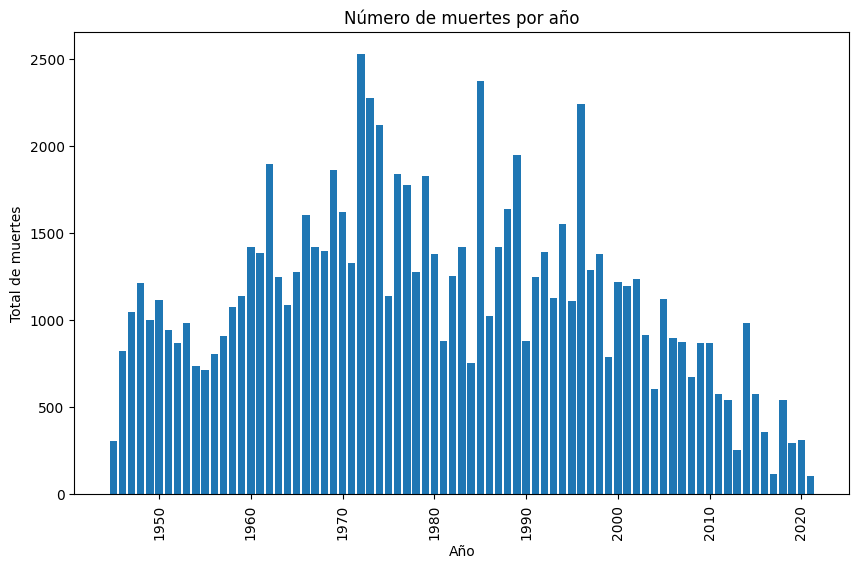

In [43]:
#creamos un grafico para una visualizacion completa de los datos
plt.figure(figsize=(10, 6))
plt.bar(muertes_por_anio_mod["año"], muertes_por_anio_mod["total_muertes"])
plt.title("Número de muertes por año")
plt.xlabel("Año")
plt.ylabel("Total de muertes")
plt.xticks(rotation=90)
plt.show()

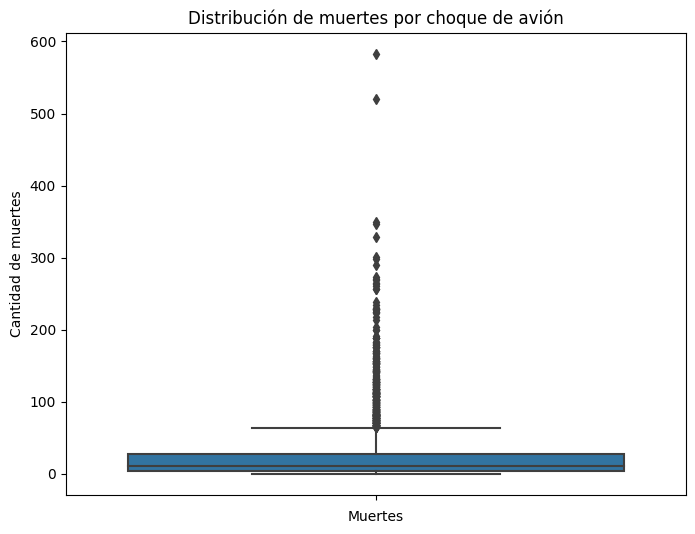

In [44]:
#Creamos el gráfico de cajas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mod, y="total_muertes")

#Añadimos título y etiquetas
plt.title("Distribución de muertes por choque de avión")
plt.xlabel("Muertes")
plt.ylabel("Cantidad de muertes")

#Mostramos el gráfico
plt.show()

Aun despues de haber borramos los dos outliers de mas de 2000 muertes, el grafico de cajas no esta como deseamos. 

In [45]:
#Localizamos los nuevos outliers
registro_mayor_400 = df_mod[df_mod["total_muertes"] > 400]
registro_mayor_400.head()

,all_aboard,cantidad de fallecidos,ground,horario,año,mar,total_muertes
2896,644,583,0,Diurno,1977,terrestre,583
3335,524,520,0,Diurno,1985,terrestre,520


In [46]:
#Borramos los registros con mas de 2000 muertes
df_mod_mod = df_mod[df_mod["total_muertes"] <= 400]

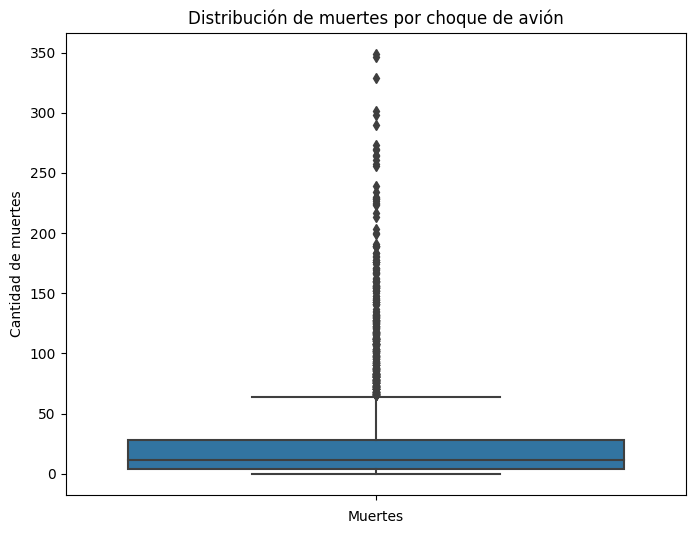

In [47]:
#Creamos el gráfico de cajas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mod_mod, y="total_muertes")

#Añadimos título y etiquetas
plt.title("Distribución de muertes por choque de avión")
plt.xlabel("Muertes")
plt.ylabel("Cantidad de muertes")

#Mostramos el gráfico
plt.show()

Para poder tener una mejor visualizacion del grafico de caja, eliminos los outliers

In [48]:
#Aplicamos la prueba de turkey
q3 = df_mod_mod["total_muertes"].quantile(0.75)
q1 = df_mod_mod["total_muertes"].quantile(0.25)
IRQ = q3-q1
minimo = q1 - 1.5*IRQ
maximo = q3 + 1.5*IRQ

In [49]:
#Aplicamos sobre el df
df_mod_mod = df_mod_mod[(df_mod_mod["total_muertes"]>minimo) & (df_mod_mod["total_muertes"]<maximo)]

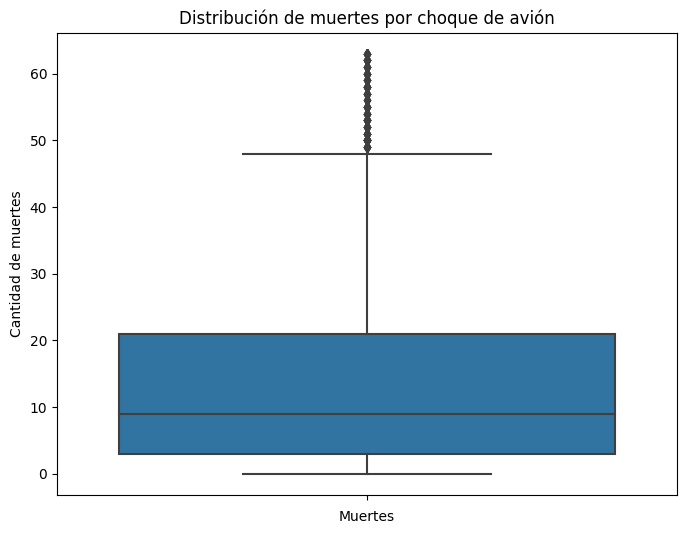

In [50]:
#Creamos el gráfico de cajas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mod_mod, y="total_muertes")

#Añadimos título y etiquetas
plt.title("Distribución de muertes por choque de avión")
plt.xlabel("Muertes")
plt.ylabel("Cantidad de muertes")

#Mostramos el gráfico
plt.show()

In [51]:
#Vemos las variables estadisticas de los dos df
df_mod.describe()

,all_aboard,cantidad de fallecidos,ground,año,total_muertes
count,3517.000000,3517.000000,3517.000000,3517.000000,3517.000000
mean,36.191356,24.576059,0.529144,1977.769690,25.105203
std,51.060110,39.058942,6.058594,20.140303,39.623761
min,1.000000,0.000000,0.000000,1945.000000,0.000000
25%,7.000000,4.000000,0.000000,1960.000000,4.000000
50%,18.000000,11.000000,0.000000,1976.000000,11.000000
75%,43.000000,28.000000,0.000000,1995.000000,28.000000
max,644.000000,583.000000,225.000000,2021.000000,583.000000


Vemos que el promedio de muertes por vuelo es de entre 14 y 15 personas, despues de aplicar estos recortes al df.

In [52]:
df_mod_mod.describe()

,all_aboard,cantidad de fallecidos,ground,año,total_muertes
count,3171.000000,3171.000000,3171.000000,3171.000000,3171.000000
mean,26.480605,14.394197,0.272469,1977.119836,14.666667
std,38.246773,14.349636,2.419205,20.419979,14.435811
min,1.000000,0.000000,0.000000,1945.000000,0.000000
25%,7.000000,3.000000,0.000000,1959.000000,3.000000
50%,16.000000,9.000000,0.000000,1976.000000,9.000000
75%,32.000000,21.000000,0.000000,1994.000000,21.000000
max,517.000000,63.000000,49.000000,2021.000000,63.000000


Observamos un cambio en la media de muertes por accidente por lo que no eliminaremos los 2 registros de 500 muertes aproximadamente.

Volvemos a trabajar con el df_mod, que contiene todos los datos desde 1945, solo algunas columnas menos que no estamos utlizando en el momento

Vamos a analizar la cantidad de muertes con respecto a las variables de interes.

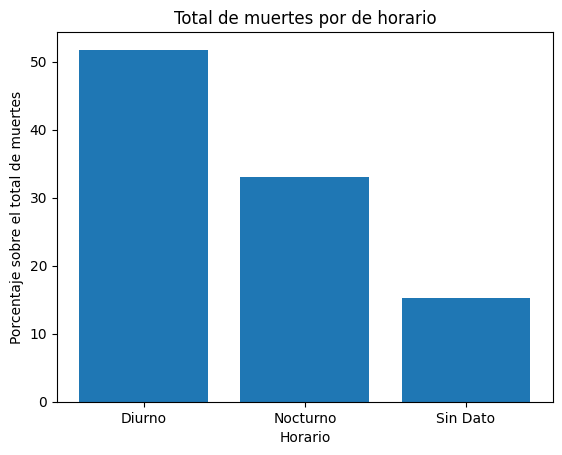

In [54]:
#Calculamos el porcentaje sobre el total de muertes totales por de horario
total_muertes = df_mod["total_muertes"].sum()
porcentaje_por_horario = df_mod.groupby("horario")["total_muertes"].sum() / total_muertes * 100

#Creamos el gráfico de barras
plt.bar(porcentaje_por_horario.index, porcentaje_por_horario.values)

#Añadimos etiquetas y título
plt.xlabel("Horario")
plt.ylabel("Porcentaje sobre el total de muertes")
plt.title("Total de muertes por de horario")

# Mostrar el gráfico
plt.show()

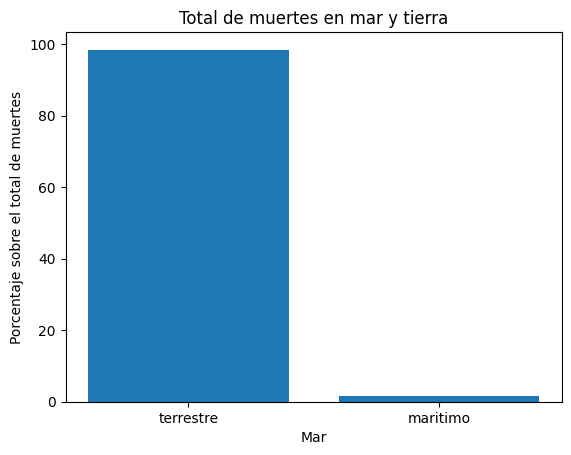

In [57]:
#Calculamos el porcentaje sobre el total de muertes totales por categoría de mar
total_muertes = df_mod["total_muertes"].sum()
porcentaje_por_mar = df_mod.groupby("mar")["total_muertes"].sum() / total_muertes * 100

#Creamos el gráfico de barras
plt.bar(porcentaje_por_mar.index, porcentaje_por_mar.values)

#Añadimos etiquetas y título
plt.xlabel("Mar")
plt.ylabel("Porcentaje sobre el total de muertes")
plt.title("Total de muertes en mar y tierra")

#Mostramos el gráfico
plt.show()

Creamos nuevos df acorde al horario para dividir el df.

In [58]:
#Filtramos los datos por horario diurno
df_diurno = df_mod[df_mod["horario"] == "Diurno"]
#Generamos el DataFrame con la suma de muertes por cada año para el horario diurno
muertes_por_anio_diurno = df_diurno.groupby("año")["total_muertes"].sum().reset_index()

#Filtramos los datos por horario nocturno
df_nocturno = df_mod[df_mod["horario"] == "Nocturno"]
#Generamo el DataFrame con la suma de muertes por cada año para el horario nocturno
muertes_por_anio_nocturno = df_nocturno.groupby("año")["total_muertes"].sum().reset_index()

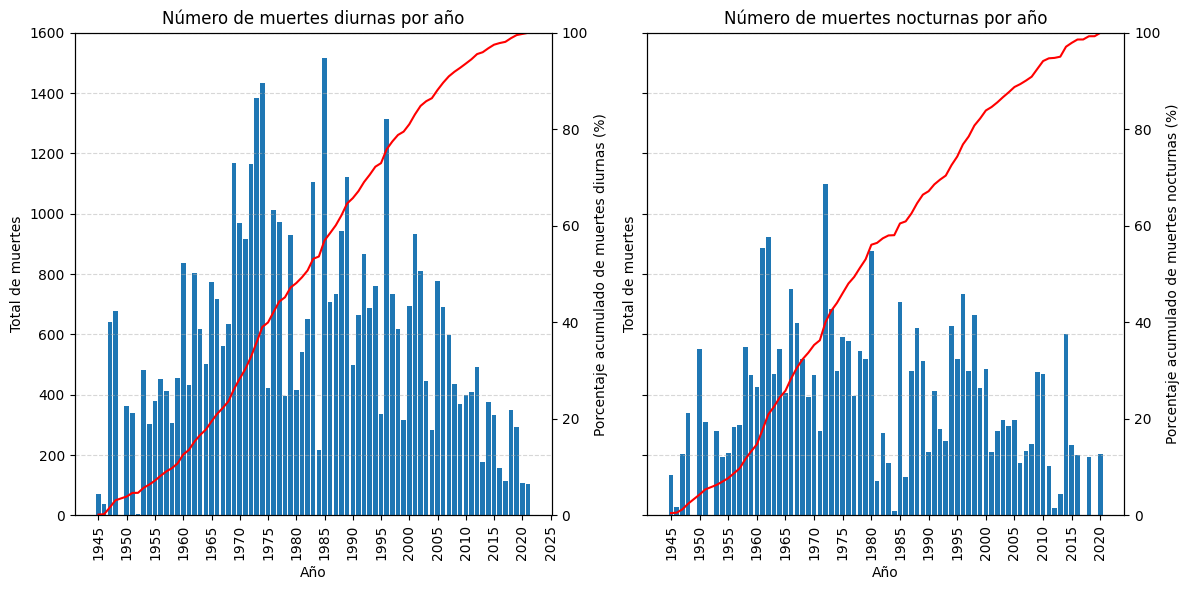

In [61]:
#Graficamos el numero de muertes por año acorde a su horario
from matplotlib.ticker import MultipleLocator

#Creamos figura y ejes para los gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Graficamos muertes diurnas
ax1.bar(muertes_por_anio_diurno["año"], muertes_por_anio_diurno["total_muertes"])
ax1.set_title("Número de muertes diurnas por año")
ax1.set_xlabel("Año")
ax1.set_ylabel("Total de muertes")
ax1.set_ylim(0, 1600)  # Ajustar el límite del eje y
ax1.xaxis.set_major_locator(MultipleLocator(5))  # Mostrar solo cada 5 años en el eje x
ax1.tick_params(axis="x", rotation=90)

#Calculamos porcentaje acumulado de muertes diurnas
porcentaje_acumulado_diurno = muertes_por_anio_diurno["total_muertes"].cumsum() / muertes_por_anio_diurno["total_muertes"].sum() * 100

#Graficamos porcentaje acumulado de muertes diurnas
ax1_secondary = ax1.twinx()
ax1_secondary.plot(muertes_por_anio_diurno["año"], porcentaje_acumulado_diurno, color="red")
ax1_secondary.set_ylabel("Porcentaje acumulado de muertes diurnas (%)")
ax1_secondary.set_ylim(0, 100)  # Ajustar el límite del eje y

#Ajustamos la cuadrícula
ax1.grid(axis="y", linestyle="--", alpha=0.5)

#Graficamos muertes nocturnas
ax2.bar(muertes_por_anio_nocturno["año"], muertes_por_anio_nocturno["total_muertes"])
ax2.set_title("Número de muertes nocturnas por año")
ax2.set_xlabel("Año")
ax2.set_ylabel("Total de muertes")
ax2.set_ylim(0, 1600)  # Ajustar el límite del eje y
ax2.xaxis.set_major_locator(MultipleLocator(5))  # Mostrar solo cada 5 años en el eje x
ax2.tick_params(axis="x", rotation=90)

#Calculamos porcentaje acumulado de muertes nocturnas
porcentaje_acumulado_nocturno = muertes_por_anio_nocturno["total_muertes"].cumsum() / muertes_por_anio_nocturno["total_muertes"].sum() * 100

#Graficamos porcentaje acumulado de muertes nocturnas
ax2_secondary = ax2.twinx()
ax2_secondary.plot(muertes_por_anio_nocturno["año"], porcentaje_acumulado_nocturno, color="red")
ax2_secondary.set_ylabel("Porcentaje acumulado de muertes nocturnas (%)")
ax2_secondary.set_ylim(0, 100)  # Ajustar el límite del eje y

#Ajustamos la cuadrícula
ax2.grid(axis="y", linestyle="--", alpha=0.5)

#Ajustamos el espacio entre los gráficos
fig.tight_layout()

#Mostramos los gráficos
plt.show()

Para mas informacion haremos el mismo grafico para la frecuencia de accidentes.

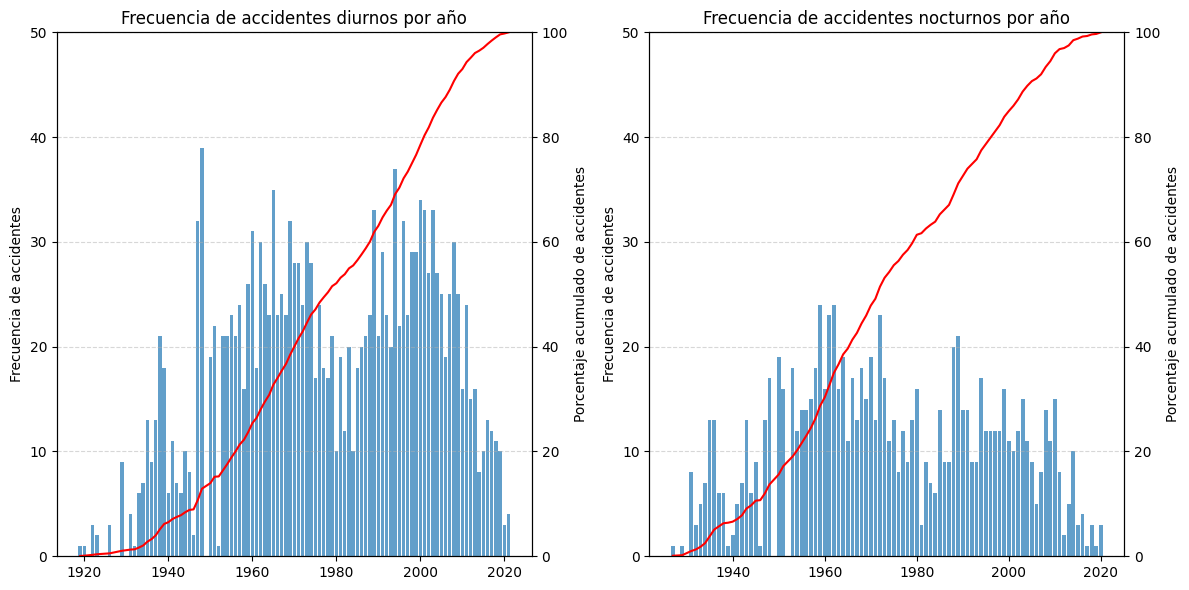

In [62]:
#Graficamos
#Filtramos los datos para el horario diurno
diurno = aviones_db[aviones_db["horario"] == "Diurno"]

#Filtramos los datos para el horario nocturno
nocturno = aviones_db[aviones_db["horario"] == "Nocturno"]

#Creamos la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Graficamos para el horario diurno
total_choques_diurno = len(diurno)
frecuencia_choques_diurno = diurno["año"].value_counts().sort_index()
porcentaje_acumulado_diurno = (frecuencia_choques_diurno / total_choques_diurno * 100).cumsum()
ax1.bar(frecuencia_choques_diurno.index, frecuencia_choques_diurno.values, alpha=0.7)
ax1.set_ylim(0, 50)
ax1.grid(axis="y", linestyle="--", alpha=0.5)
ax1.set_ylabel("Frecuencia de accidentes")
ax1.set_title("Frecuencia de accidentes diurnos por año")

#Graficamos de línea para el porcentaje acumulado de choques diurnos
ax1_line = ax1.twinx()
ax1_line.plot(frecuencia_choques_diurno.index, porcentaje_acumulado_diurno, linestyle="-", color="red")
ax1_line.set_ylim(0, 100)
ax1_line.set_ylabel("Porcentaje acumulado de accidentes")

#Graficamos para el horario nocturno
total_choques_nocturno = len(nocturno)
frecuencia_choques_nocturno = nocturno["año"].value_counts().sort_index()
porcentaje_acumulado_nocturno = (frecuencia_choques_nocturno / total_choques_nocturno * 100).cumsum()
ax2.bar(frecuencia_choques_nocturno.index, frecuencia_choques_nocturno.values, alpha=0.7)
ax2.set_ylim(0, 50)
ax2.grid(axis="y", linestyle="--", alpha=0.5)
ax2.set_ylabel("Frecuencia de accidentes")
ax2.set_title("Frecuencia de accidentes nocturnos por año")

#Graficamos de línea para el porcentaje acumulado de choques nocturnos
ax2_line = ax2.twinx()
ax2_line.plot(frecuencia_choques_nocturno.index, porcentaje_acumulado_nocturno, linestyle="-", color="red")
ax2_line.set_ylim(0, 100)
ax2_line.set_ylabel("Porcentaje acumulado de accidentes")

#Ajustamos los espacios entre los subplots
fig.tight_layout()

#Mostramos los gráficos
plt.show()

Antes de exportar, observamos el data frame. 

In [63]:
#Visualizamos las primeras filas
aviones_1945.head()

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,horario,año,mes,dia,Pais,mar,total_muertes
767,China National Aviation Corporation,Douglas C-47,77,4,4,0,The cargo plane crashed in strong winds,Sin Dato,1945,January,Saturday,India,terrestre,4
768,Pan American World Airways,Martin M-130 (flying boat),NC14716,30,23,0,The aircraft crashed 1.25 miles short of the i...,Nocturno,1945,January,Monday,Trinidad,terrestre,23
769,American Airlines,Douglas DC-3,NC25684,24,24,0,"The aircraft, lost in fog, crashed into the Ve...",Nocturno,1945,January,Wednesday,United States,terrestre,24
770,China National Aviation Corporation,Douglas C-47,70,6,4,0,The cargo plane struck a mountain.,Sin Dato,1945,January,Sunday,China,terrestre,4
771,China National Aviation Corporation,Douglas C-47,Sin Dato,3,3,0,Sin Dato,Sin Dato,1945,January,Tuesday,China,terrestre,3


In [64]:
#Visualizamos las ultimas filas
aviones_1945.tail()

,OperadOR,ac_type,registration,all_aboard,cantidad de fallecidos,ground,summary,horario,año,mes,dia,Pais,mar,total_muertes
4996,South West Aviaiton,Antonov 26B,EX-126,8,7,0,The cargo plane lost height shortly after depa...,Diurno,2020,August,Saturday,South Sudan,terrestre,7
4998,Sriwijaya Air,Boeing 737-524,PK-CLC,62,62,0,Sriwijaya Air flight 182 was climbing through ...,Diurno,2021,January,Saturday,Indonesia,terrestre,62
4999,South Sudan Supreme Airlines,Let L-410UVP-E,HK-4274,10,10,0,One of the engines on the aircraft failed 10 m...,Diurno,2021,March,Tuesday,Sudan,terrestre,10
5000,Soloy Helicopters,Eurocopter AS350B3 Ecureuil,N351SH,6,5,0,The sightseeing helicopter crashed after missi...,Diurno,2021,March,Sunday,United States,terrestre,5
5004,Kamchatka Aviation Enterprise,Antonov An 26B-100,RA-26085,28,28,0,The passenger plane crashed into the top of a ...,Diurno,2021,July,Tuesday,Russia,terrestre,28


In [65]:
#Observamos nulos
aviones_1945.isnull().sum()

OperadOR                  0
ac_type                   0
registration              0
all_aboard                0
cantidad de fallecidos    0
ground                    0
summary                   0
horario                   0
año                       0
mes                       0
dia                       0
Pais                      0
mar                       0
total_muertes             0
dtype: int64

In [70]:
#Creamos el df con las columnas de interes
aviones_1945_mod = aviones_1945[["all_aboard", "cantidad de fallecidos", "ground", "total_muertes", "horario", "año", "mar", "OperadOR", "ac_type", "registration", "Pais"]].copy()
aviones_1945_mod.head()

,all_aboard,cantidad de fallecidos,ground,total_muertes,horario,año,mar,OperadOR,ac_type,registration,Pais
767,4,4,0,4,Sin Dato,1945,terrestre,China National Aviation Corporation,Douglas C-47,77,India
768,30,23,0,23,Nocturno,1945,terrestre,Pan American World Airways,Martin M-130 (flying boat),NC14716,Trinidad
769,24,24,0,24,Nocturno,1945,terrestre,American Airlines,Douglas DC-3,NC25684,United States
770,6,4,0,4,Sin Dato,1945,terrestre,China National Aviation Corporation,Douglas C-47,70,China
771,3,3,0,3,Sin Dato,1945,terrestre,China National Aviation Corporation,Douglas C-47,Sin Dato,China


In [71]:
#Exportamos
aviones_1945_mod.to_csv('/Users/tobiasolivapinto/Desktop/Proyecto Individual 2 - Henry/AccidentesAviones_EDA3.csv', index=False)

A medida que trabajamos en PowerBI, van a apareciendo nuevas necesidades. Ahora, agregaremos dos coolumna al df. 

Despues de continuar analizando la base de datos en PowerBI, decidimos exportar un df completo, donde se recorten los datos desde la otra aplicacion.

In [107]:
#Creamos df
aviones_PBI = aviones_db[["año", "mes", "dia", "Pais", "mar", "horario", "OperadOR", "ac_type", "registration", "summary", "all_aboard", "cantidad de fallecidos", "ground", "total_muertes"]].copy()

In [ ]:
#Creamos la columna marca
aviones_PBI["Marca"] = aviones_PBI["ac_type"].apply(lambda x: x.split()[0] if isinstance(x, str) else "")

In [112]:
#Visualizamos
aviones_PBI.tail(5)

,año,mes,dia,Pais,mar,horario,OperadOR,ac_type,registration,summary,all_aboard,cantidad de fallecidos,ground,total_muertes,Marca
4996,2020,August,Saturday,South Sudan,terrestre,Diurno,South West Aviaiton,Antonov 26B,EX-126,The cargo plane lost height shortly after depa...,8,7,0,7,Antonov
4998,2021,January,Saturday,Indonesia,terrestre,Diurno,Sriwijaya Air,Boeing 737-524,PK-CLC,Sriwijaya Air flight 182 was climbing through ...,62,62,0,62,Boeing
4999,2021,March,Tuesday,Sudan,terrestre,Diurno,South Sudan Supreme Airlines,Let L-410UVP-E,HK-4274,One of the engines on the aircraft failed 10 m...,10,10,0,10,Let
5000,2021,March,Sunday,United States,terrestre,Diurno,Soloy Helicopters,Eurocopter AS350B3 Ecureuil,N351SH,The sightseeing helicopter crashed after missi...,6,5,0,5,Eurocopter
5004,2021,July,Tuesday,Russia,terrestre,Diurno,Kamchatka Aviation Enterprise,Antonov An 26B-100,RA-26085,The passenger plane crashed into the top of a ...,28,28,0,28,Antonov


In [123]:
#Exportamos
aviones_PBI.to_csv('/Users/tobiasolivapinto/Desktop/Proyecto Individual 2 - Henry/AccidentesAviones_PBI4.csv', index=False)